In [311]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [312]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [313]:
#Loading the dataset

df=pd.read_excel('Brazil_COVID_19.xlsx')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [314]:
#Checking all the columns
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [315]:
#Checking the shape
df.shape

(5644, 111)

In [316]:
#Checking the data type
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [317]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


Observation:
    
    1-The data set consist of 5644 rows and 111 columns.
    
    2-This dataset consist of numeric columns and categorical columns both.
    
    3-It seems that there are some columns with all values equal null, so I'll drop these columns.

# To Check the missing value

In [318]:
#Checking for any missing data
#(df.isnull().sum()==df.shape[0]).any()   another approach to check any missing values are present or not.
df.isnull().values.any()

True

In [319]:
#Checking the number missing values in columns
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

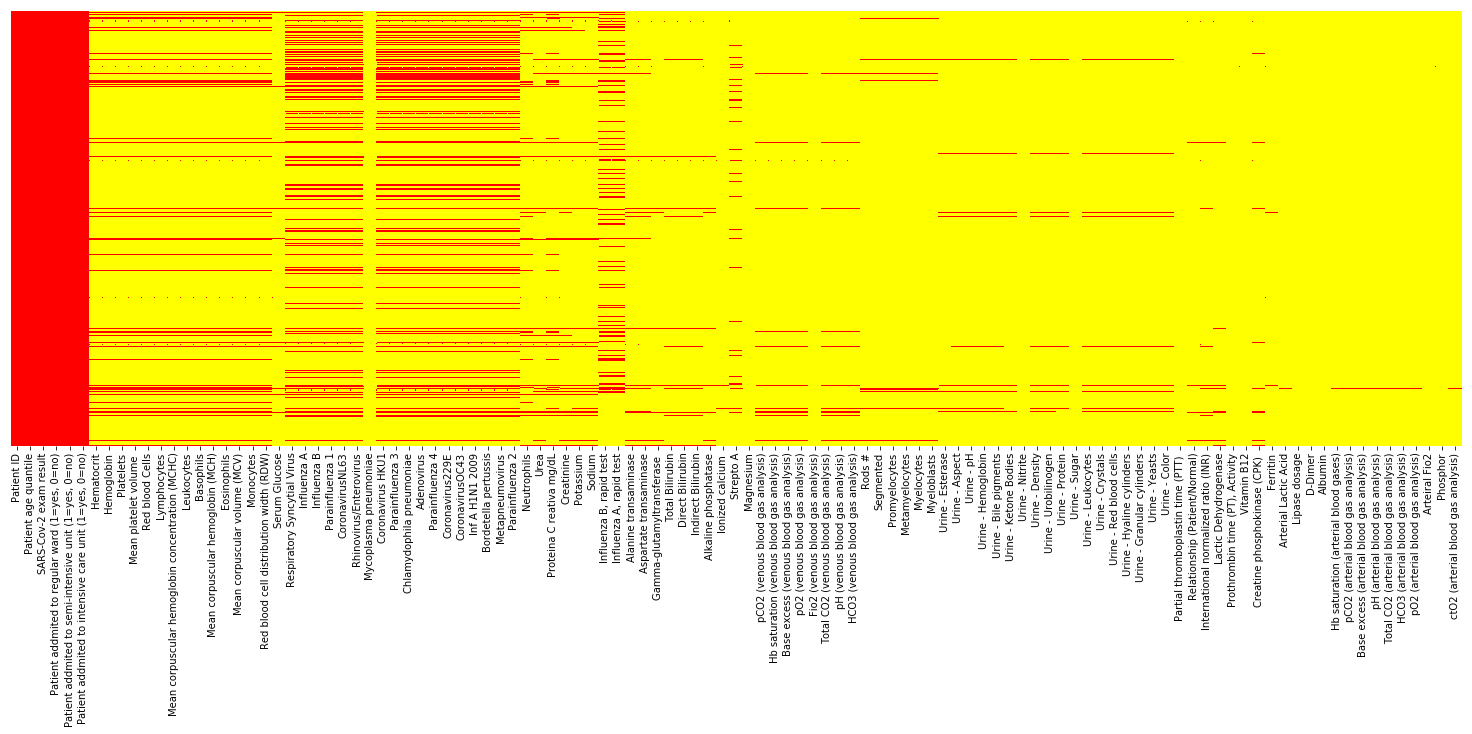

In [320]:
#Seeing the missing values via visualization
plt.figure(figsize=(26,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='autumn')
plt.show()

Observation:
    
    There are too many columns which have missing number so to visualize the missing number in bar plot we have to import
    the missingno as mnso. But before doing this first we have to install the missingno command via pip method

In [321]:
!pip install missingno

distributed 1.21.8 requires msgpack, which is not installed.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [322]:
#Importing the missing value 
import missingno as mnso

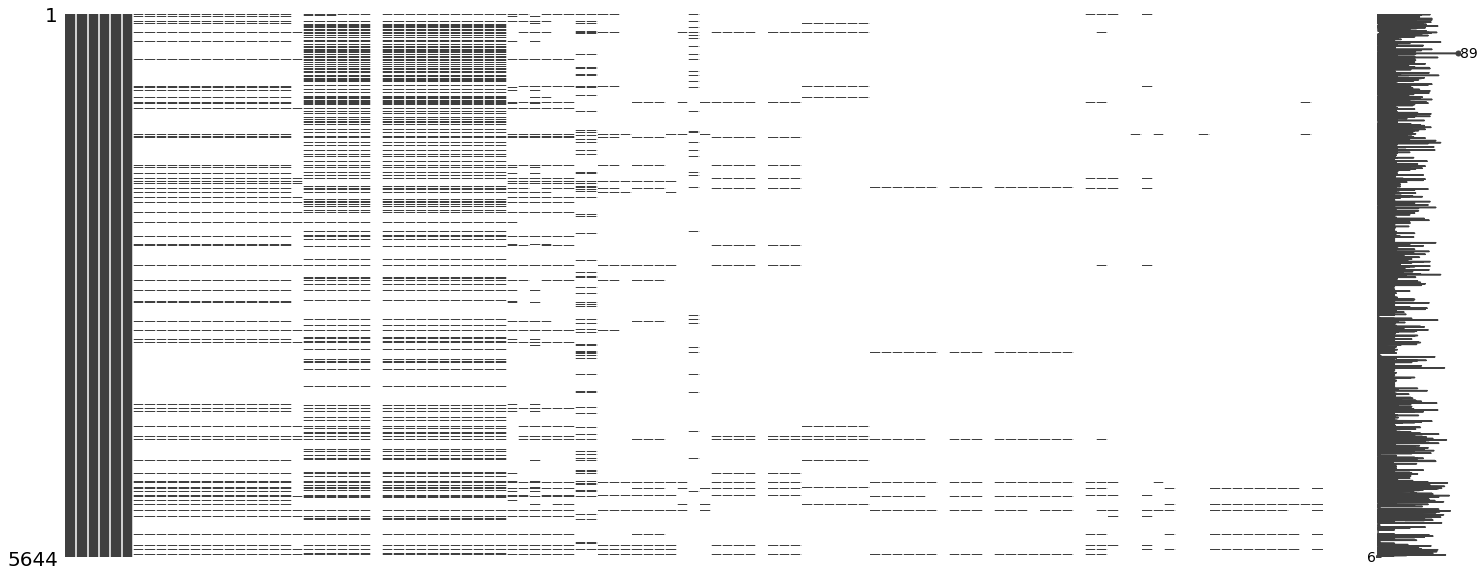

In [323]:
#Missing value matrix
mnso.matrix(df)

Observation:
    
    From this view it is clearly shown that maximum number of columns have missing values in higher amount.

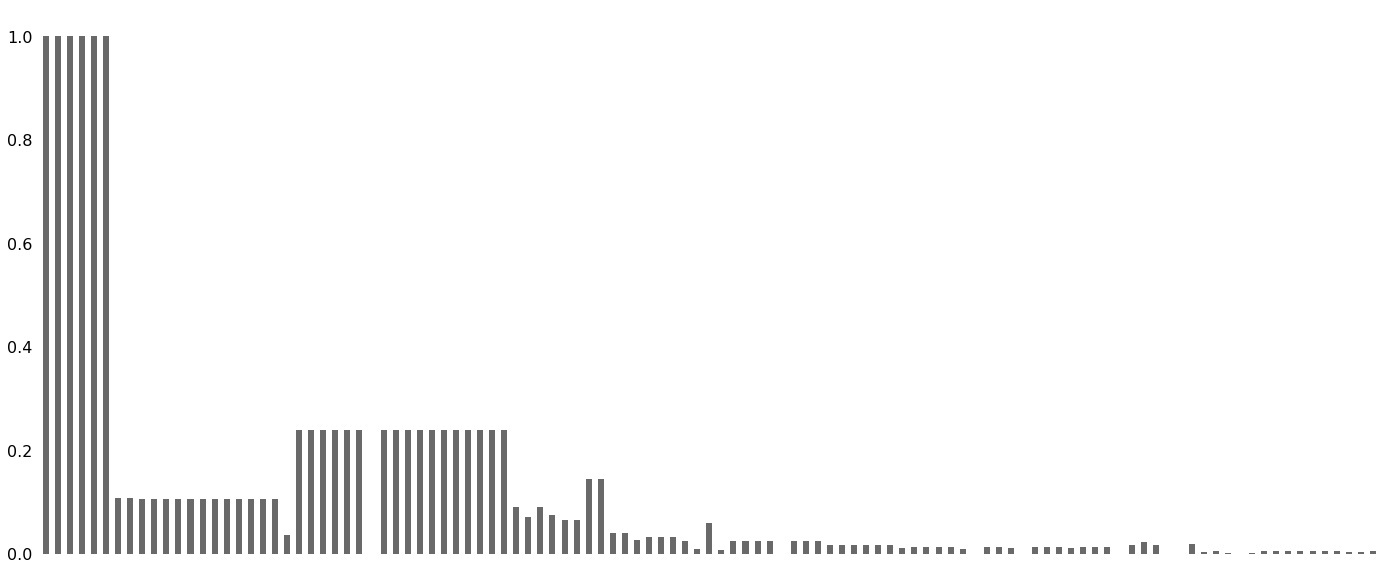

In [324]:
# checking null values
mnso.bar(df)

Findings:

    It shows bars that are proportional to the number of non-missing values as well as providing the actual number of
    non-missing values. We get an idea of how much of each column is missing.

Observation:
    
    It seems that there are some columns with all values equal null, so I'll drop them.

In [325]:
#Checking the null values
(df.isnull().sum() == df.shape[0]).any()

True

In [326]:
#Columns having all the values null.
full_null_series = (df.isnull().sum() == df.shape[0])    #Columns which have all the values equal to NaN or not
full_null_columns = full_null_series[full_null_series == True].index  #Columns which have all the value NaN
full_null_columns

Index(['Mycoplasma pneumoniae', 'Urine - Sugar',
       'Partial thromboplastin time (PTT) ', 'Prothrombin time (PT), Activity',
       'D-Dimer'],
      dtype='object')

In [327]:
#Columns with all values equal null
print(full_null_columns.tolist())     #Pandas tolist() is used to convert a series to list.

['Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer']


Observation:
    
    These are the columns which have contains all the values equal to NaN so we will drop these columns.

In [328]:
#Dropping the columns which contains all the null values.
df.drop(full_null_columns, axis=1, inplace=True)

Note:
    
    We still have many values null in the dataset. I'll drop the columns that only have one value in the target, since
    they'll hardly help to discriminate the presence of Covid-19.

In [329]:
#Seeing the NaN values in ratio
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head()

Fio2 (venous blood gas analysis)    0.999823
Urine - Nitrite                     0.999823
Vitamin B12                         0.999468
Lipase dosage                       0.998583
Albumin                             0.997697
dtype: float64

In [330]:
#Checking the columns which is not equal to zero values.
contain_null_series = (df.isnull().sum() != 0).index
contain_null_series.tolist()

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/d

In [331]:
#Printing the unique value and their count for target variable.

print(df['SARS-Cov-2 exam result'].value_counts())
print('\n')
print(df['SARS-Cov-2 exam result'].unique())

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


['negative' 'positive']


In [332]:
#Finding the columns present when the target column is negative COVID case
target = 'SARS-Cov-2 exam result'
just_one_target = []

for col in contain_null_series:
    i = df[df[col].notnull()][target].nunique()
    if i == 1:
        just_one_target.append(col)    

#Columns that only are present when covid is negative        
print(just_one_target)

['Fio2 (venous blood gas analysis)', 'Urine - Nitrite', 'Vitamin B12', 'Albumin']


In [333]:
#Checking it
for col in just_one_target:
    print(df[df[col].notnull()][target].unique())

['negative']
['negative']
['negative']
['negative']


In [334]:
#Droping that columns
df.drop(just_one_target, axis=1, inplace=True)

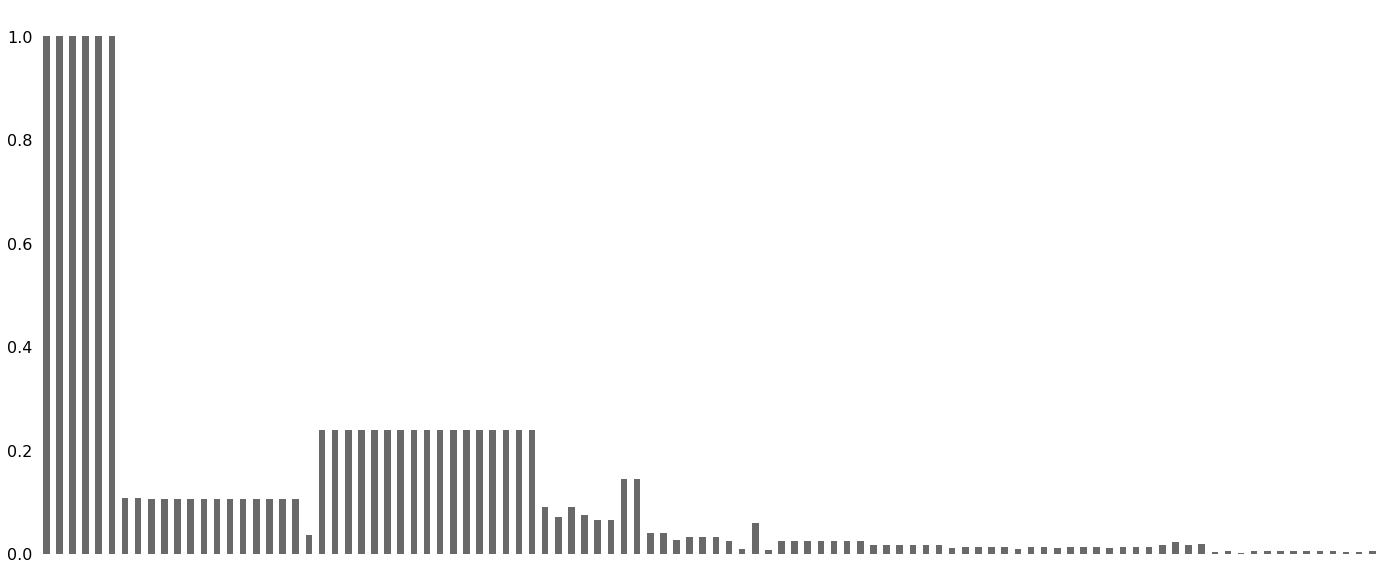

In [335]:
mnso.bar(df)

Observation:
    
    We still have many null values in the dataset. I'll plot the columns that doesn't have any null to check if they
    can discriminate the target.

In [336]:
#Checking the Shape
df.shape

(5644, 102)

In [337]:
#Printing the columns which do not contains any null values
not_null_series = (df.isnull().sum() == 0)
not_null_columns = not_null_series[not_null_series == True].index
not_null_columns = not_null_columns[1:]
not_null_columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

In [338]:
#Printing the Object data type columns and their unique values

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column)+ ' : ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('*****************************************************************************************************')
        print('\n')

Patient ID : ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
2f8f92495ce6aa8    1
757b47a2330687a    1
4219f16a615b4c5    1
791a23ffc19c105    1
4b43668bdc683e1    1
8c1431be6f8a6ab    1
892c576858dea6c    1
63aeba2b01cb895    1
02caeba12dc4ea5    1
28840b236c52992    1
51fe0c0546ec719    1
50a1da316f116e0    1
e26adf634d1b1f3    1
8eb7bff499bb989    1
8706242a991dffd    1
93ab996e3be1277    1
3bbf4161dbc6525    1
998c7ba8a5a7342    1
2bbded8140dad93    1
38036ebfb263fed    1
c49b31419a9eb2d    1
12a66f6079f4761    1
2e619b22def24fd    1
d9b8220c0dd2c88    1
a52b710be330f8b    1
f5fb75e4dc57c38    1
bfd61d4712049d9    1
ef776ce54491e8a    1
b734e4f0312d2b4    1
39a0dbaf985de9b    1
                  ..
0e5de2b9ad67c5a    1
def383f6a1cd4eb    1
198e4366f29169a    1
b1cadd531af20cb    1
dc00f87e8d11175    1
1040dc25a208d2c    1
cbacea5084b5a38    1
cc97a793363452a    1
a46af0995d812ef    1
51c6d93a9f28449    1
1662256c538

# Visualization

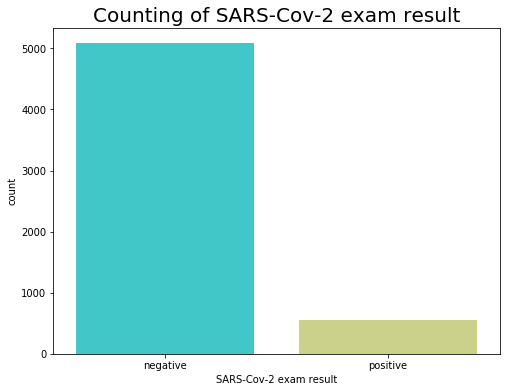

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


In [339]:
#Counting of SARS-Cov-2 exam result
plt.figure(figsize=(8,6))
sns.countplot(x='SARS-Cov-2 exam result',data=df,palette='rainbow')
plt.title("Counting of SARS-Cov-2 exam result",fontsize=20)
plt.show()

print(df['SARS-Cov-2 exam result'].value_counts())

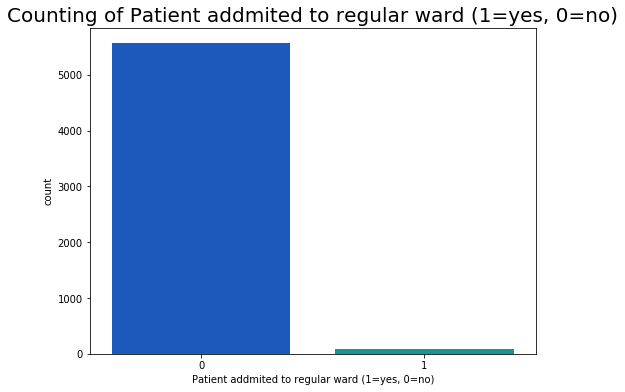

0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64


In [340]:
#Counting of Patient addmited to regular ward (1=yes, 0=no)
plt.figure(figsize=(8,6))
sns.countplot(x='Patient addmited to regular ward (1=yes, 0=no)',data=df,palette='winter')
plt.title("Counting of Patient addmited to regular ward (1=yes, 0=no)",fontsize=20)
plt.show()

print(df['Patient addmited to regular ward (1=yes, 0=no)'].value_counts())

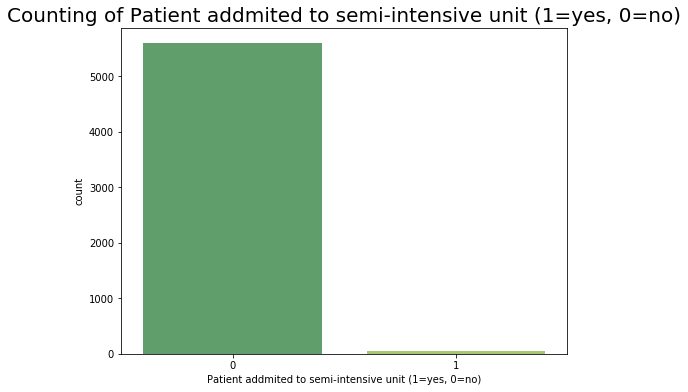

0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64


In [341]:
#Counting of Patient addmited to semi-intensive unit (1=yes, 0=no)
plt.figure(figsize=(8,6))
sns.countplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)',data=df,palette='summer')
plt.title("Counting of Patient addmited to semi-intensive unit (1=yes, 0=no)",fontsize=20)
plt.show()

print(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'].value_counts())

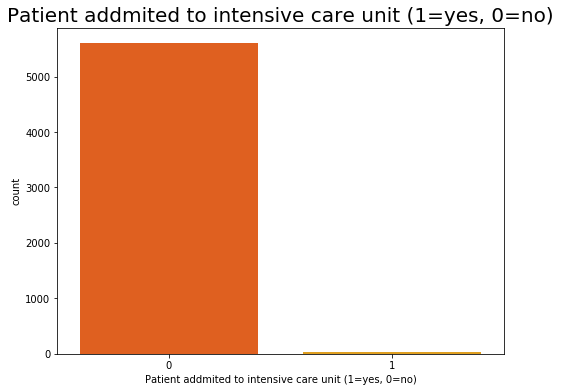

0    5603
1      41
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64


In [342]:
#Counting of Patient addmited to intensive care unit (1=yes, 0=no)
plt.figure(figsize=(8,6))
sns.countplot(x='Patient addmited to intensive care unit (1=yes, 0=no)',data=df,palette='autumn')
plt.title("Patient addmited to intensive care unit (1=yes, 0=no)",fontsize=20)
plt.show()

print(df['Patient addmited to intensive care unit (1=yes, 0=no)'].value_counts())

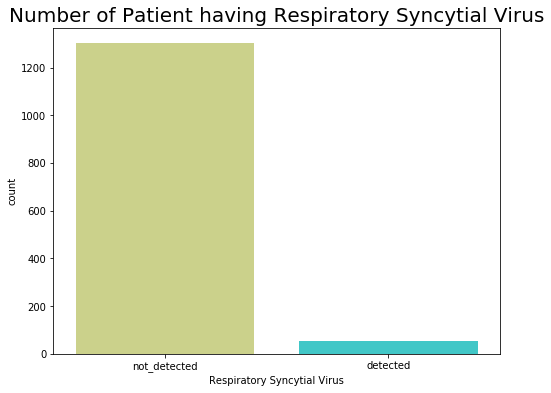

not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64


In [343]:
#Counting of Patient having Respiratory Syncytial Virus
plt.figure(figsize=(8,6))
sns.countplot(x='Respiratory Syncytial Virus',data=df,palette='rainbow_r')
plt.title("Number of Patient having Respiratory Syncytial Virus",fontsize=20)
plt.show()

print(df['Respiratory Syncytial Virus'].value_counts())

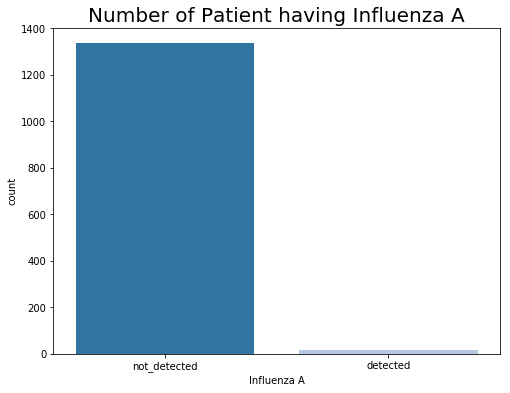

not_detected    1336
detected          18
Name: Influenza A, dtype: int64


In [344]:
#Counting of Patient having Influenza A
plt.figure(figsize=(8,6))
sns.countplot(x='Influenza A',data=df,palette='tab20')
plt.title("Number of Patient having Influenza A",fontsize=20)
plt.show()

print(df['Influenza A'].value_counts())

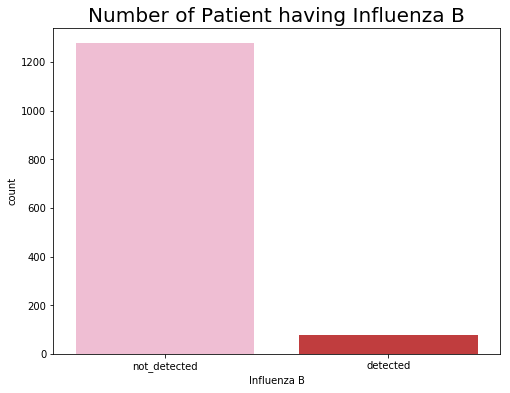

not_detected    1277
detected          77
Name: Influenza B, dtype: int64


In [345]:
#Counting of Patient having Influenza B
plt.figure(figsize=(8,6))
sns.countplot(x='Influenza B',data=df,palette='tab20_r')
plt.title("Number of Patient having Influenza B",fontsize=20)
plt.show()

print(df['Influenza B'].value_counts())

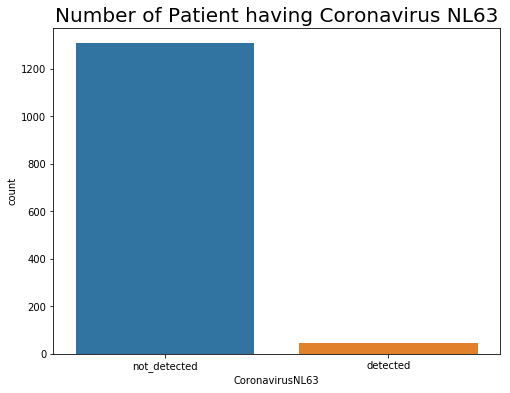

not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64


In [346]:
#Counting of Patient Coronavirus NL63
plt.figure(figsize=(8,6))
sns.countplot(x='CoronavirusNL63',data=df,palette='tab10')
plt.title("Number of Patient having Coronavirus NL63",fontsize=20)
plt.show()

print(df['CoronavirusNL63'].value_counts())

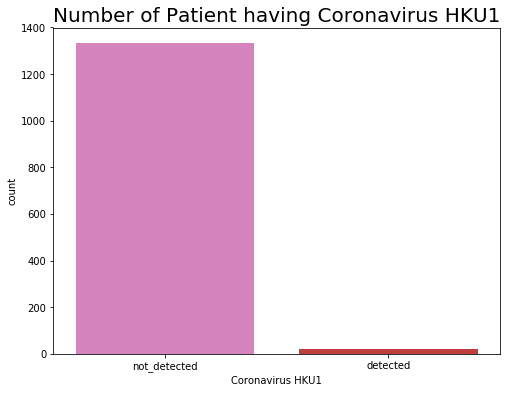

not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64


In [347]:
#Counting of Patient Coronavirus HKU1
plt.figure(figsize=(8,6))
sns.countplot(x='Coronavirus HKU1',data=df,palette='tab10_r')
plt.title("Number of Patient having Coronavirus HKU1",fontsize=20)
plt.show()

print(df['Coronavirus HKU1'].value_counts())

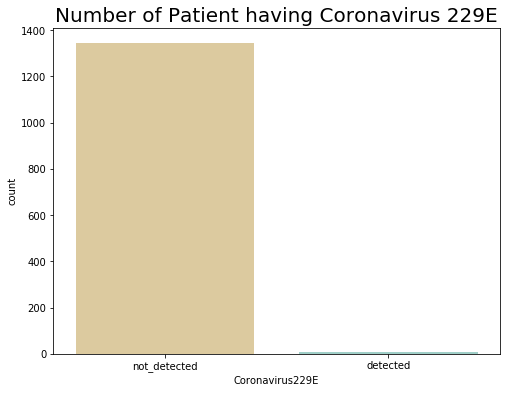

not_detected    1343
detected           9
Name: Coronavirus229E, dtype: int64


In [348]:
#Counting of Patient Coronavirus 229E
plt.figure(figsize=(8,6))
sns.countplot(x='Coronavirus229E',data=df,palette='BrBG')
plt.title("Number of Patient having Coronavirus 229E",fontsize=20)
plt.show()

print(df['Coronavirus229E'].value_counts())

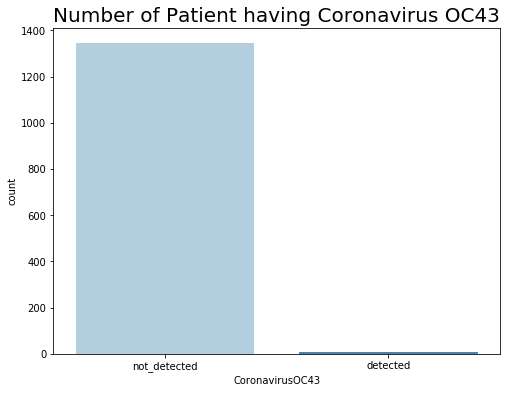

not_detected    1344
detected           8
Name: CoronavirusOC43, dtype: int64


In [349]:
#Counting of Patient Coronavirus OC43
plt.figure(figsize=(8,6))
sns.countplot(x='CoronavirusOC43',data=df,palette='Blues')
plt.title("Number of Patient having Coronavirus OC43",fontsize=20)
plt.show()

print(df['CoronavirusOC43'].value_counts())

It's hard to see any feature that can help determine presence of covid-19. I'll prepare the data do convert categorical 
features to numeric and examine the feature importance of the features with decision tree models.

### Handeling categorical columns

In [350]:
# dataprep categorical
mask_pos_neg = {'positive': 1, 'negative': 0}
mask_detected = {'detected': 1, 'not_detected': 0}
mask_notdone_absent_present = {'not_done': 0, 'absent': 1, 'present': 2}
mask_normal = {'normal': 1}
mask_urine_color = {'light_yellow': 1, 'yellow': 2, 'citrus_yellow': 3, 'orange': 4}
mask_urine_aspect = {'clear': 1, 'lightly_cloudy': 2, 'cloudy': 3, 'altered_coloring': 4}
mask_realizado = {'Não Realizado': 0}
mask_urine_leuk = {'<1000': 1000}
mask_urine_crys = {'Ausentes': 1, 'Urato Amorfo --+': 0, 'Oxalato de Cálcio +++': 0,
                   'Oxalato de Cálcio -++': 0, 'Urato Amorfo +++': 0}

In [351]:
df = df.replace(mask_detected)
df = df.replace(mask_pos_neg)
df = df.replace(mask_notdone_absent_present)
df = df.replace(mask_normal)
df = df.replace(mask_realizado)
df = df.replace(mask_urine_leuk)
df = df.replace(mask_urine_color)
df = df.replace(mask_urine_aspect)
df = df.replace(mask_urine_crys)

df['Urine - pH'] = df['Urine - pH'].astype('float')
df['Urine - Leukocytes'] = df['Urine - Leukocytes'].astype('float')

In [352]:
#Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [353]:
df.fillna(999999, inplace=True)
df.head(3)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,1588,13,0,0,0,0,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
1,451,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
2,3669,8,0,0,0,0,999999.00

## Feature importances

Now I'll check the most important features according to decision tree. This information can bring insights by applying
feature engineering to improve the classification of the target.

In [354]:
#Splitting the data into x and y
x = df.drop(['Patient ID', 'SARS-Cov-2 exam result'], axis=1)

y = df['SARS-Cov-2 exam result']

In [355]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

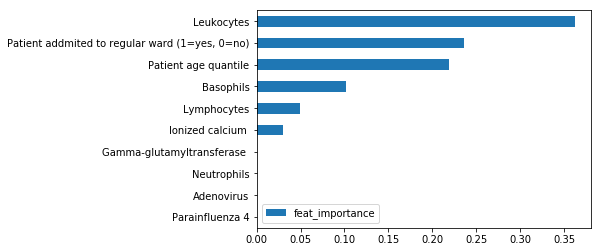

In [356]:
dt_features = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_features.sort_values('feat_importance').tail(10).plot.barh()
plt.show()

By looking at the Leukocytes, it seems that this feature helps to discriminate the data indeed. This feature can bring
insights for doctors when analyzing a patient.

# Model Training

In [357]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(5644, 100) 		 (5644,)


In [358]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [359]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [360]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(4515, 100) 		 (1129, 100)


In [361]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(4515,) 	 (1129,)


In [362]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [363]:
# All Algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.8981399468556245
[[1013    4]
 [ 111    1]]
             precision    recall  f1-score   support

          0       0.90      1.00      0.95      1017
          1       0.20      0.01      0.02       112

avg / total       0.83      0.90      0.85      1129

*****************************************************************************************


Accuracy score of GaussianNB(priors=None) is:
0.8511957484499557
[[945  72]
 [ 96  16]]
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      1017
          1       0.18      0.14      0.16       112

avg / total       0.84      0.85      0.84      1129

*********************************************************

In [364]:
#Cross Validate the models

models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.8994709  0.89920424 0.89655172 0.89893617 0.89893617 0.90159574
 0.90159574 0.89893617 0.90159574 0.90159574 0.91223404 0.89893617
 0.89095745 0.89095745 0.88829787]
Mean Score: 0.8986534223817177
Standard deviation: 0.005480050955527153
************************************************************************************************


Model: GaussianNB(priors=None)
Score: [0.77248677 0.85411141 0.81697613 0.85106383 0.8643617  0.8537234
 0.875      0.8537234  0.8962766  0.8856383  0.90957447 0.80585106
 0.80851064 0.75265957 0.82446809]
Mean Score: 0.8416283579648705
Standard deviation: 0.042959588581125634
************************************************************************************************


Mode

All the models gives the best score so we use GridSearchCv to find the best model.

# Using GridSearchCV to find out best parameter

In [365]:
#Using GridSearchCV to find out the best parameter in LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters={'C':[1,10],'random_state':range(42,56)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [366]:
#Using GridSearchCV to find out the best parameter in DecisionTreeClassifier

parameters={'criterion':['gini','entropy'],'random_state':range(42,60)}
dtc=DecisionTreeClassifier()

clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 57}


In [367]:
#Using GridSearchCV to find out the best parameter in DecisionTreeClassifier

parameters={'n_neighbors':[5,10,15,20]}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 15}


In [368]:
#Using GridSearchCV to find out the best parameters in RandomForestClassifier

parameters={'n_estimators':[10,50,100,200,300],'max_depth':[4,5,6,],'criterion':['gini','entropy']}
RFC=RandomForestClassifier()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 10}


In [369]:
#Using GridSearchCV to find out the best parameter in GradientBoostingClassifier

parameters={'n_estimators':[100,200,300]}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 100}


In [370]:
#Using GridSearchCV to find out the best parameter in BaggingClassifier

parameters={'n_estimators':[10,50,100,200]}
bc=BaggingClassifier()

clf=GridSearchCV(bc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 200}


## Applying the result in models

In [372]:
LR=LogisticRegression(C=1,random_state=42)

DTC=DecisionTreeClassifier(criterion='entropy', random_state=57)

KNN=KNeighborsClassifier(n_neighbors=15)

SVM = SVC(kernel='rbf',C=10,random_state=42)

RFC=RandomForestClassifier(n_estimators=10, max_depth=5,criterion='entropy')

GBC=GradientBoostingClassifier(criterion='friedman_mse', random_state=42, learning_rate=0.1, n_estimators=300, max_depth=4)

ABC=AdaBoostClassifier(learning_rate=1.0, n_estimators=50, random_state=42)

BC=BaggingClassifier(n_estimators=200, max_features=1.0, max_samples=1.0, random_state=52)

ETC=ExtraTreesClassifier(n_estimators=100)

In [375]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifier',KNN))
models.append(('SupportVectorClassifier',SVM))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))
models.append(('ExtraTreesClassifer',ETC))

****************** LogisticRegression *****************************


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy Score: 0.8981399468556245


Cross Val Score: 0.8986534223817177


ROC_AUC_Score: 0.502497717376036


[[1013    4]
 [ 111    1]]


Classification_report 
              precision    recall  f1-score   support

          0       0.90      1.00      0.95      1017
          1       0.20      0.01      0.02       112

avg / total       0.83      0.90      0.85      1129



AxesSubplot(0.125,0.808774;0.775x0.0712264)



****************** DecisionTreeClassifier *****************************


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0

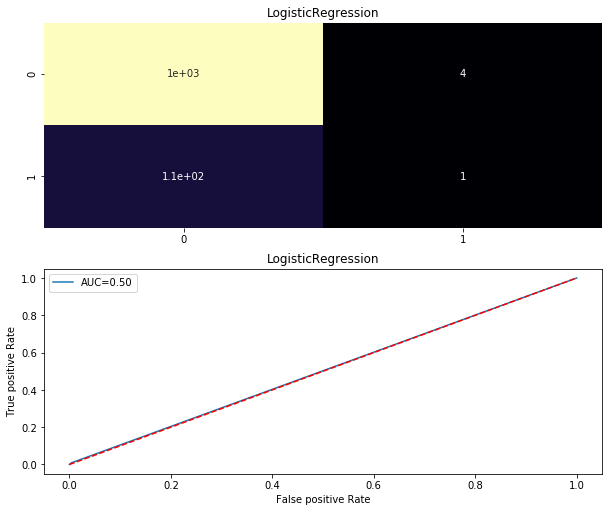

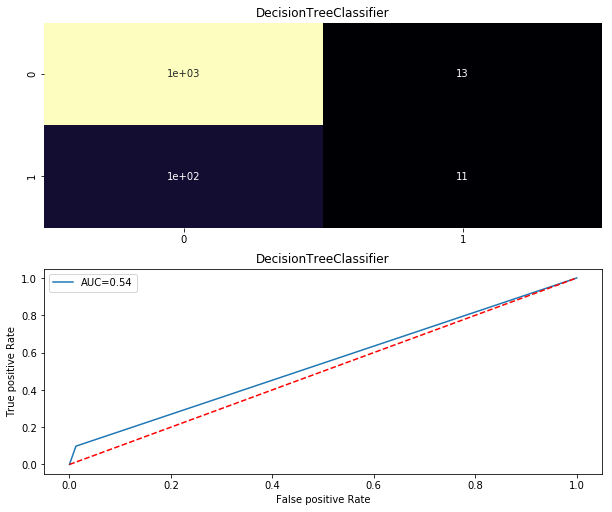

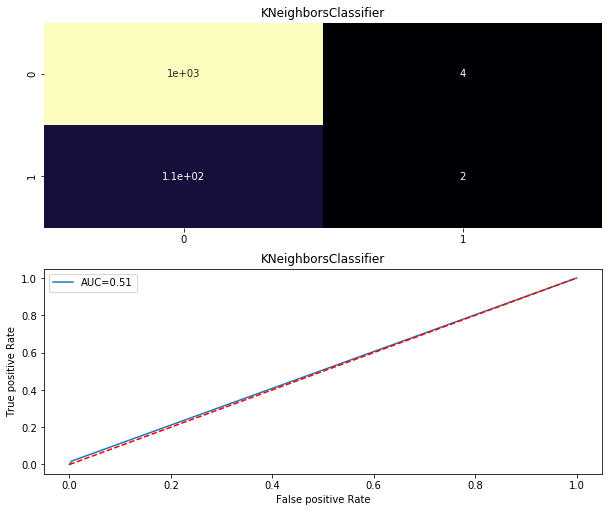

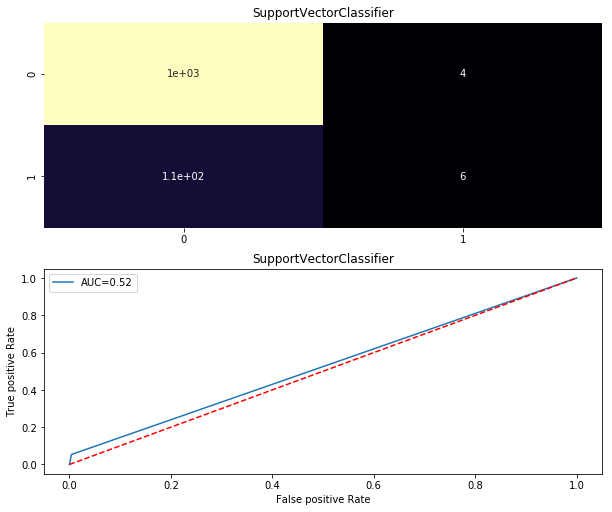

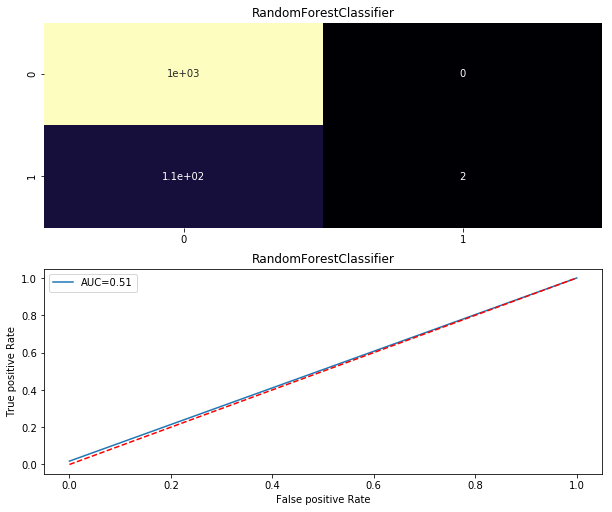

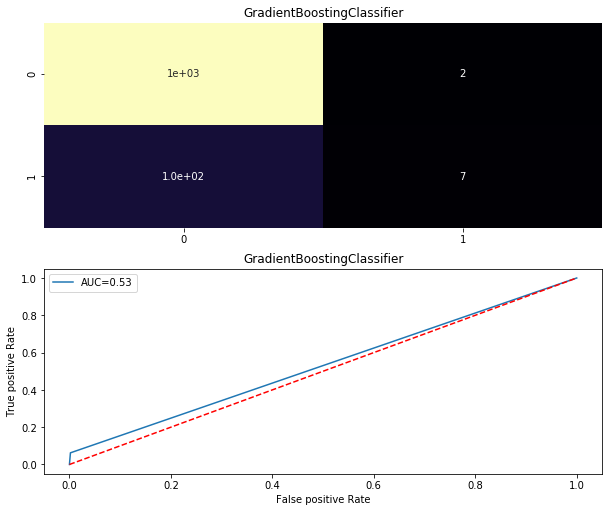

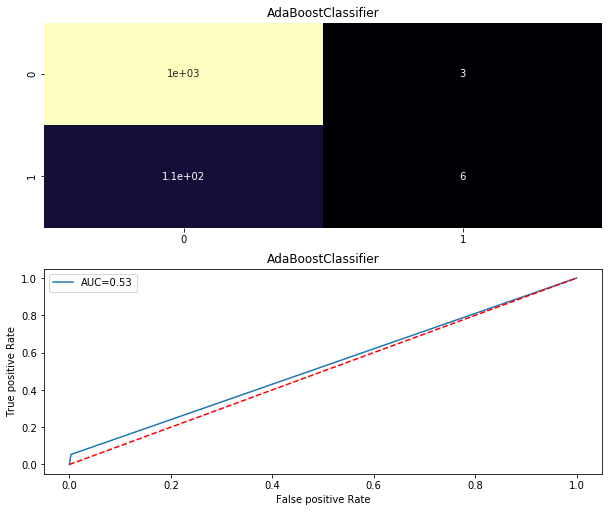

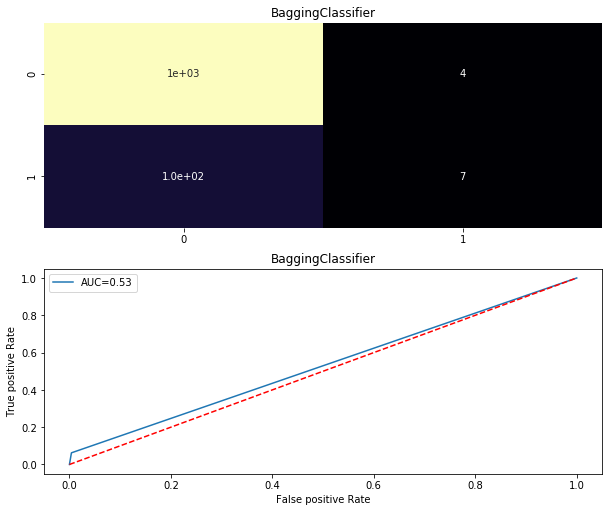

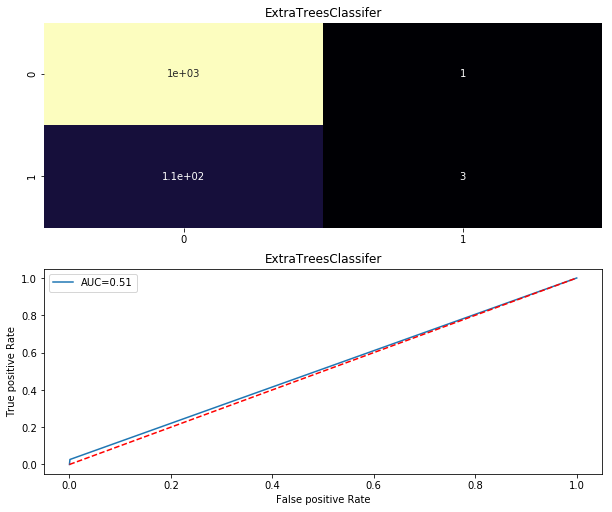

In [376]:
Model=[]
score=[]
CVS=[]
ROC_Score=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_Score:',roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print('Classification_report \n',classification_report(y_test,pred))
    print('\n')
    
    #ConfusionMatrix via Heatmap
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='magma'))
    plt.subplot(912)
    plt.title(name)
    
    #ROC Curve
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    print('\n\n')

In [377]:
#Storing the result in a dataframe
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Val_Score':CVS,'ROC_AUC_Score':ROC_Score})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_Score
0,LogisticRegression,89.813995,89.865342,50.249772
1,DecisionTreeClassifier,89.902569,89.600512,54.271580
2,KNeighborsClassifier,89.902569,90.007139,50.696200
3,SupportVectorClassifier,90.256864,89.883120,52.481915
4,RandomForestClassifier,90.256864,90.202175,50.892857
5,GradientBoostingClassifier,90.522586,90.308652,53.026672
6,AdaBoostClassifier,90.345438,90.379526,52.531079
7,BaggingClassifier,90.345438,90.166761,52.928343
8,ExtraTreesClassifer,90.256864,89.829882,51.290122


## I choose DecisionTreeClassifier as my final model

In [378]:
#Saving this model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(DTC,'BRAZIL_COVID_19_.pkl')

['BRAZIL_COVID_19_.pkl']